### Importing required libraries

In [1]:
import pandas as pd
import numpy as np

### Importing Dataset

In [2]:
df= pd.read_csv('Downloads/archive (4)/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Preprocessing the data by removing data that's not necessary and one hot encoding some categorical features

In [4]:
df= df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
encoder = OneHotEncoder(sparse_output=False)

In [9]:
encoded_data = encoder.fit_transform(df[['Geography', 'Gender']])

In [10]:
feature_names = encoder.get_feature_names_out(['Geography', 'Gender'])

In [11]:
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

In [12]:
df = pd.concat([encoded_df, df], axis=1)

In [13]:
df= df.drop(['Geography','Gender'], axis=1)

In [14]:
df.shape

(10000, 14)

In [15]:
df.NumOfProducts.value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [16]:
df_encoded = pd.get_dummies(df, columns=['NumOfProducts'])

In [17]:
df_encoded[['NumOfProducts_1','NumOfProducts_2','NumOfProducts_3','NumOfProducts_4']] = df_encoded[['NumOfProducts_1','NumOfProducts_2','NumOfProducts_3','NumOfProducts_4']].astype(int)

In [18]:
df_encoded.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1.0,0.0,0.0,1.0,0.0,619,42,2,0.00,1,1,101348.88,1,1,0,0,0
1,0.0,0.0,1.0,1.0,0.0,608,41,1,83807.86,0,1,112542.58,0,1,0,0,0
2,1.0,0.0,0.0,1.0,0.0,502,42,8,159660.80,1,0,113931.57,1,0,0,1,0
3,1.0,0.0,0.0,1.0,0.0,699,39,1,0.00,0,0,93826.63,0,0,1,0,0
4,0.0,0.0,1.0,1.0,0.0,850,43,2,125510.82,1,1,79084.10,0,1,0,0,0


In [20]:
df.Tenure.value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

### Scaling the numerical data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
cols=['CreditScore','Age','Tenure','Balance','Balance','EstimatedSalary']

In [23]:
df_scaled= df_encoded.copy()

In [24]:
df_scaled[cols]= scaler.fit_transform(df_scaled[cols])

In [25]:
df_scaled.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1.0,0.0,0.0,1.0,0.0,-0.326221,0.293517,-1.041760,-1.225848,1,1,0.021886,1,1,0,0,0
1,0.0,0.0,1.0,1.0,0.0,-0.440036,0.198164,-1.387538,0.117350,0,1,0.216534,0,1,0,0,0
2,1.0,0.0,0.0,1.0,0.0,-1.536794,0.293517,1.032908,1.333053,1,0,0.240687,1,0,0,1,0
3,1.0,0.0,0.0,1.0,0.0,0.501521,0.007457,-1.387538,-1.225848,0,0,-0.108918,0,0,1,0,0
4,0.0,0.0,1.0,1.0,0.0,2.063884,0.388871,-1.041760,0.785728,1,1,-0.365276,0,1,0,0,0


In [26]:
X= df_scaled.drop(['Exited'], axis=1)

In [27]:
y= df_scaled.Exited

### Splitting the data into train and test data in order to calculate accuracy

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Classification using Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf1= LogisticRegression()

In [32]:
clf1.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred= clf1.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print(accuracy_score(y_test,y_pred))

0.843


In [36]:
from sklearn import metrics

In [38]:
import matplotlib.pyplot as plt

In [39]:
def conf(y_test,y_pred):
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
plt.show()

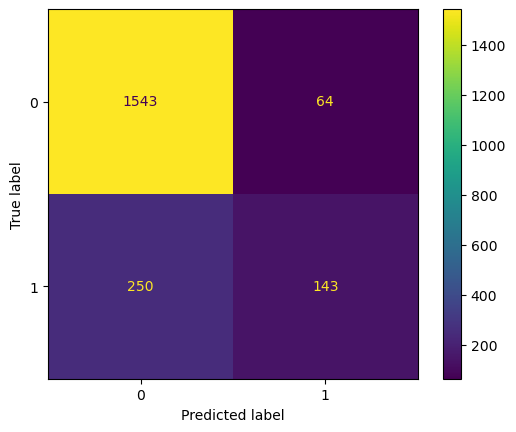

In [40]:
conf(y_test,y_pred)

### Classification using Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred2 = clf2.predict(X_test)

In [44]:
print(accuracy_score(y_test,y_pred2))

0.867


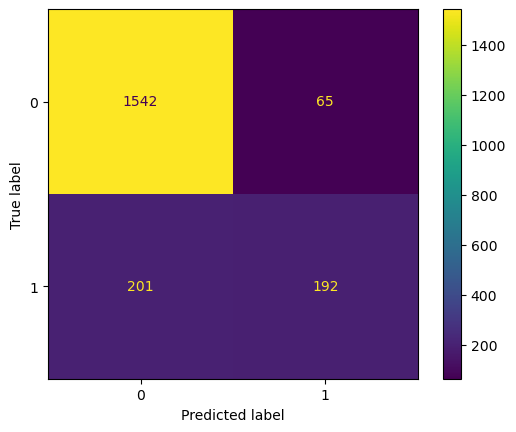

In [45]:
conf(y_test,y_pred2)

### Classification using Gradient Boost 

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
clf3.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [48]:
y_pred3 = clf3.predict(X_test)

In [49]:
print(accuracy_score(y_test,y_pred3))

0.864


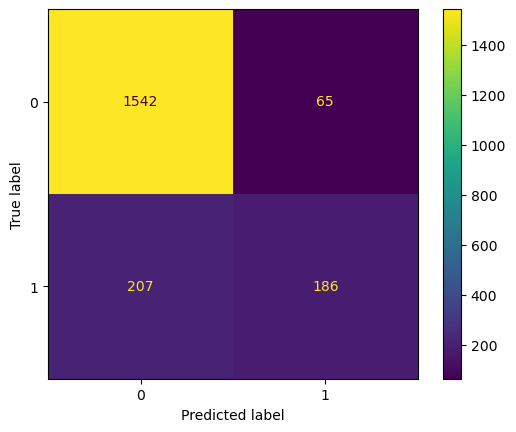

In [50]:
conf(y_test,y_pred3)